<h1> Data Augmentation </h1>

To increase the dataset size, I will be performing multiple data augmentation steps for existing data and create new images.

1. Position augmentation:
    Flipping
    Rotation
    Translation
    Affine transformation
2. Color augmentation:
    Brightness
    Contrast
3. Gaussian Noise
    
    
Additionals: Generative adversarial network, Style Transfer

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Original Image
original_image = cv2.imread('data/images/style_transfer/healthy/001.png')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

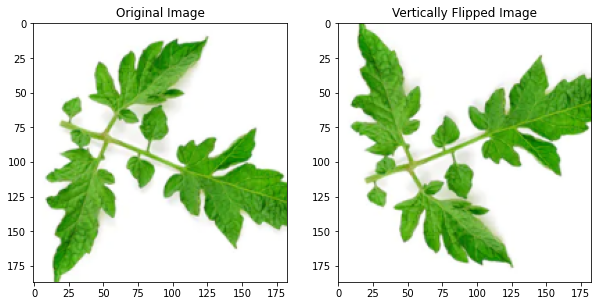

In [3]:
# Flip Vertical
original_image_vflip = cv2.flip(original_image, 0)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(original_image_vflip)
plt.title("Vertically Flipped Image")
plt.show()


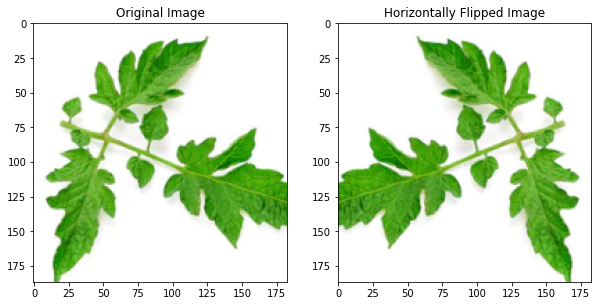

In [4]:
# Flip Horizontal
original_image_hzlflip = cv2.flip(original_image, 1)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(original_image_hzlflip)
plt.title("Horizontally Flipped Image")
plt.show()

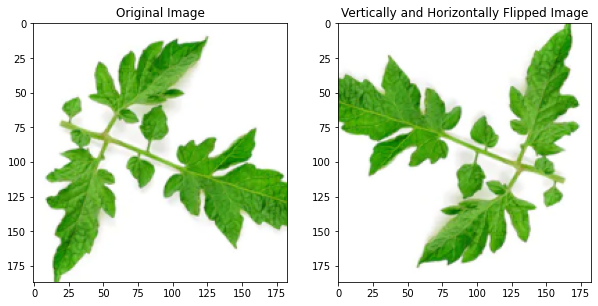

In [5]:
# On Both Axis: Horizontal and Vertical
original_image_vhzlflip = cv2.flip(original_image, -1)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(original_image_vhzlflip)
plt.title("Vertically and Horizontally Flipped Image")
plt.show()

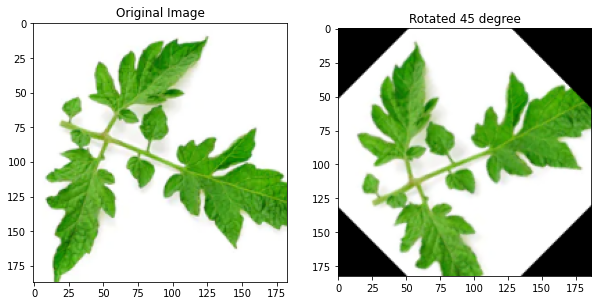

In [6]:
# Rotate Image
def rotate_image(img, angle, scale):
    # get image height, width
    (h, w) = img.shape[:2]
    
    # calculate the center of the image
    center = (w / 2, h / 2)
    
    a_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(img, a_matrix, (h, w))
    return rotated

rotated = rotate_image(original_image, 45, 1)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(rotated)
plt.title("Rotated 45 degree")
plt.show()

In [7]:
# Affine Transformation
def transformation(src, dst, img):
    rows, cols = img.shape[:2]
    M = cv2.getAffineTransform(src, dst) 
    transformed = cv2.warpAffine(img, M, (cols, rows)) 
    return transformed

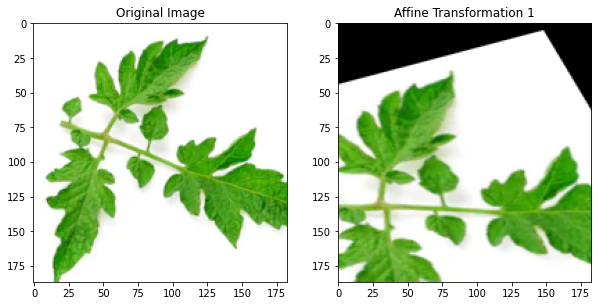

In [8]:
# Transformation 1
src = np.float32([[50, 50], 
                   [200, 50],  
                   [50, 200]]) 
  
dst = np.float32([[10, 100], 
                   [200, 50],  
                   [100, 250]])   

transformed = transformation(src, dst, original_image)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(transformed)
plt.title("Affine Transformation 1")
plt.show()

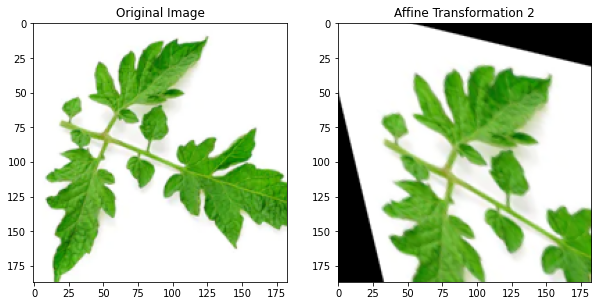

In [9]:
# Transformation 2
src = np.float32([[10,10],[10,70],[70,10]])
dst = np.float32([[1,1],[20,80],[80,20]])

transformed = transformation(src, dst, original_image)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(transformed)
plt.title("Affine Transformation 2")
plt.show()

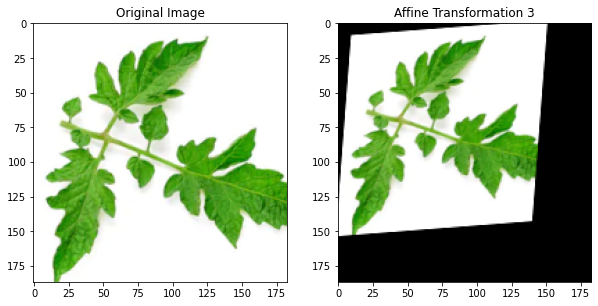

In [10]:
# Transformation 3
src = np.float32([[1,1],[20,80],[80,20]])
dst = np.float32([[10,10],[20,70],[70,20]])

transformed = transformation(src, dst, original_image)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(transformed)
plt.title("Affine Transformation 3")
plt.show()

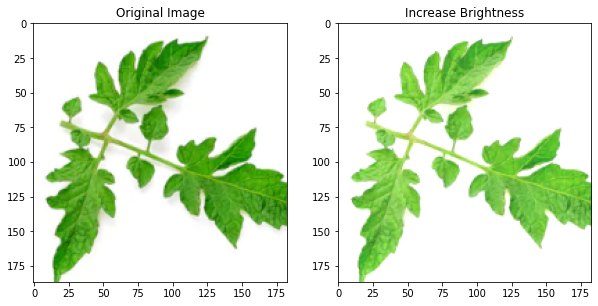

In [11]:
# Increase Brightness
value = 40
new_image = np.where((255 - original_image) < value, 255, original_image + value)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(new_image)
plt.title("Increase Brightness")
plt.show()

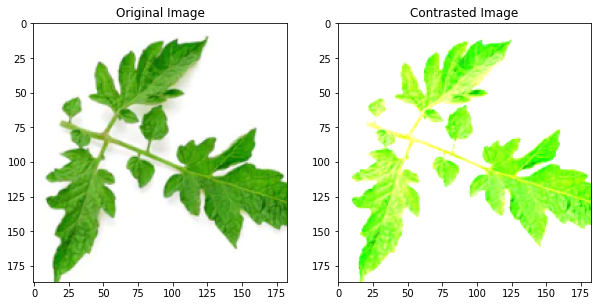

In [12]:
# Increase contrast
alpha = 2 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

contrasted_image = cv2.convertScaleAbs(original_image, alpha=alpha, beta=beta)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(contrasted_image)
plt.title("Contrasted Image")
plt.show()

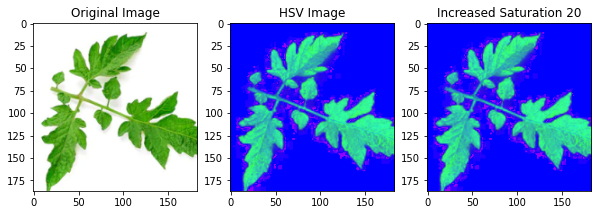

In [13]:
# increase color saturation
image_hsv = cv2.cvtColor(original_image, cv2.COLOR_RGB2HSV)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 3, 2)
plt.imshow(image_hsv)
plt.title("HSV Image")

in_saturation_image = cv2.cvtColor(image_hsv, 
    cv2.COLOR_HSV2RGB)

fig.add_subplot(1, 3, 3)
plt.imshow(image_hsv)
plt.title("Increased Saturation 20")
plt.show()

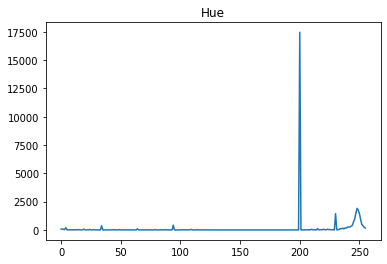

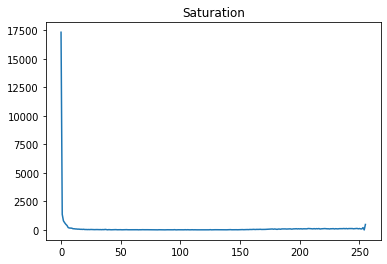

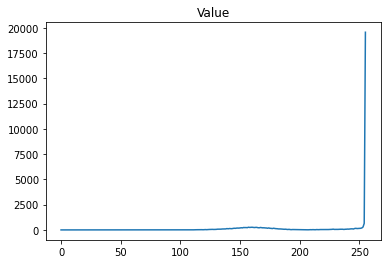

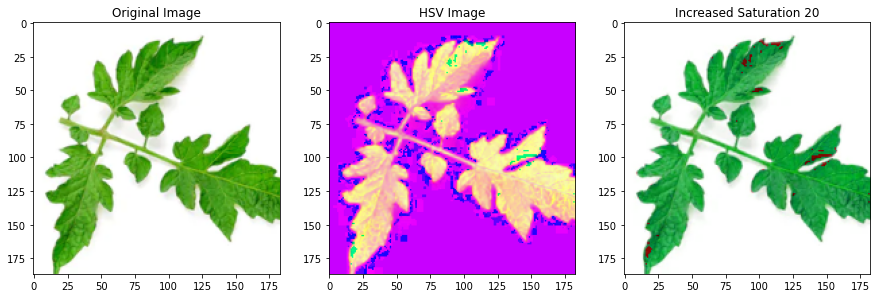

In [14]:
# importing library for plotting 
from matplotlib import pyplot as plt 
# original_image = cv2.imread('data/images/style_transfer/healthy/a.png')
# original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

image_hsv = cv2.cvtColor(original_image, cv2.COLOR_RGB2HSV)

image_hsv[:,:,0] += 200

histh = cv2.calcHist([image_hsv],[0],None,[256],[0,256])
hists = cv2.calcHist([image_hsv],[1],None,[256],[0,256])
histv = cv2.calcHist([image_hsv],[2],None,[256],[0,256])

# show the plotting graph of an image 
plt.plot(histh) 
plt.title("Hue")
plt.show() 

plt.plot(hists)
plt.title("Saturation")
plt.show() 

plt.plot(histv) 
plt.title("Value")
plt.show() 

fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 3, 2)
plt.imshow(image_hsv)
plt.title("HSV Image")

in_saturation_image = cv2.cvtColor(image_hsv, 
    cv2.COLOR_HSV2RGB)

fig.add_subplot(1, 3, 3)
plt.imshow(in_saturation_image)
plt.title("Increased Saturation 20")
plt.show()

<class 'numpy.ndarray'>


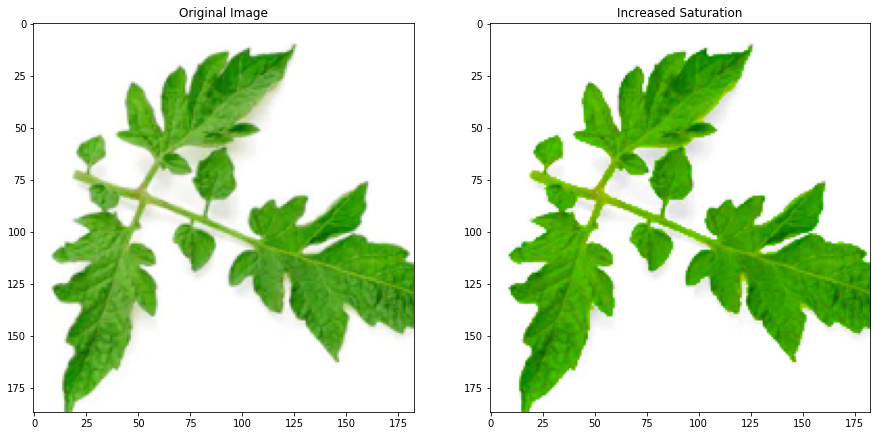

In [15]:
#  Create Mask
lower = (30, 50, 20)
upper = (90, 255, 255)
image_hsv = cv2.cvtColor(original_image, cv2.COLOR_RGB2HSV)
green_mask = cv2.inRange(image_hsv, lower, upper)
print(type(image_hsv))
image_hsv[:,:,1] = green_mask
#original_image[green_mask == 255] = (0, 255, 0)

in_saturation_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(in_saturation_image)
plt.title("Increased Saturation")
plt.show()

In [16]:
image_hsv = cv2.cvtColor(original_image, cv2.COLOR_RGB2HSV)
print(image_hsv.shape)
a = original_image.copy()


(187, 183, 3)


In [17]:
print(a.shape, a[:,:,0][green_mask == 255].shape)

(187, 183, 3) (10933,)


In [18]:
print(type(a[green_mask == 255]), type(a), 187*183)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 34221


In [25]:
for i,row in enumerate(a[green_mask == 255]):    
    print(i, row)

0 [174 196 146]
1 [135 160 110]
2 [119 139 103]
3 [116 171  84]
4 [159 195 139]
5 [ 95 146  92]
6 [ 65 128  61]
7 [ 62 105  52]
8 [162 189 152]
9 [ 91 143  73]
10 [ 61 133  31]
11 [187 220 170]
12 [168 198 143]
13 [128 180 106]
14 [ 90 162  48]
15 [ 71 159  16]
16 [ 66 153  20]
17 [108 156  80]
18 [ 92 148  81]
19 [ 28 120  22]
20 [ 28 137  24]
21 [ 39 134  35]
22 [ 73 114  71]
23 [135 189 136]
24 [109 170 105]
25 [ 88 151  74]
26 [ 85 150  60]
27 [ 88 155  54]
28 [ 55 127  20]
29 [ 37 123  17]
30 [ 51 133  34]
31 [111 167  85]
32 [169 201 148]
33 [119 173  85]
34 [ 92 162  50]
35 [ 80 158  37]
36 [ 76 158  35]
37 [ 65 156  11]
38 [ 64 165   0]
39 [ 68 169   3]
40 [122 175  84]
41 [139 175 132]
42 [ 68 127  48]
43 [ 46 125  17]
44 [ 37 140   7]
45 [ 28 142   3]
46 [ 27 133  10]
47 [ 50 121  45]
48 [160 204 161]
49 [165 203 158]
50 [115 172 101]
51 [ 86 157  75]
52 [ 71 150  63]
53 [ 65 145  57]
54 [ 65 145  58]
55 [ 61 140  53]
56 [ 59 138  51]
57 [ 55 135  44]
58 [ 50 131  34]
59 [ 45

912 [ 92 175  20]
913 [ 99 172  26]
914 [114 169  59]
915 [163 196 135]
916 [ 89 147  69]
917 [ 48 127   9]
918 [ 60 149   6]
919 [ 51 145   0]
920 [ 59 155   3]
921 [ 63 155   1]
922 [ 59 147   2]
923 [ 76 160  16]
924 [ 84 169  16]
925 [ 82 172  11]
926 [ 80 153  22]
927 [162 192 139]
928 [183 214 159]
929 [ 81 139  46]
930 [ 38 126  12]
931 [ 36 136  13]
932 [ 34 134   8]
933 [ 45 132   3]
934 [ 91 169  35]
935 [ 90 168  29]
936 [ 74 155  16]
937 [ 51 133   3]
938 [ 36 116   1]
939 [ 29 115   0]
940 [ 40 131   1]
941 [ 59 151  11]
942 [ 54 146  10]
943 [ 39 131   6]
944 [ 36 128   3]
945 [ 22 116   0]
946 [ 19 121   0]
947 [ 31 134   4]
948 [ 28 129   2]
949 [ 39 130   6]
950 [ 63 137  20]
951 [ 98 153  43]
952 [112 172  53]
953 [102 171  46]
954 [ 98 170  44]
955 [106 175  55]
956 [113 177  66]
957 [110 176  72]
958 [104 171  65]
959 [ 99 168  55]
960 [111 180  64]
961 [117 185  74]
962 [118 185  81]
963 [123 184  84]
964 [127 179  86]
965 [151 183 110]
966 [192 208 150]
967 [206 2

1813 [104 175  58]
1814 [104 173  55]
1815 [102 171  52]
1816 [ 92 160  40]
1817 [110 171  69]
1818 [145 191 117]
1819 [121 168 100]
1820 [ 90 139  70]
1821 [ 88 140  65]
1822 [ 81 133  53]
1823 [ 92 142  63]
1824 [113 158  92]
1825 [147 187 128]
1826 [182 212 163]
1827 [112 182  88]
1828 [ 80 166  40]
1829 [ 83 170  32]
1830 [ 73 157  13]
1831 [ 75 158  11]
1832 [ 90 173  25]
1833 [ 88 172  15]
1834 [ 82 168   7]
1835 [ 77 165   8]
1836 [ 84 170  16]
1837 [ 86 169  22]
1838 [ 65 146   3]
1839 [ 90 160  20]
1840 [ 94 144  24]
1841 [169 195 135]
1842 [124 166  84]
1843 [ 80 160  11]
1844 [ 89 169  29]
1845 [ 82 160  28]
1846 [107 185  54]
1847 [ 94 174  34]
1848 [ 71 150  11]
1849 [ 75 154  22]
1850 [ 79 168  27]
1851 [ 61 154   8]
1852 [ 66 155  14]
1853 [ 76 167  27]
1854 [ 61 149  13]
1855 [ 99 170  49]
1856 [ 74 145  27]
1857 [ 55 132   9]
1858 [ 80 148  24]
1859 [114 174  53]
1860 [117 177  62]
1861 [108 177  58]
1862 [108 182  58]
1863 [121 189  70]
1864 [123 188  72]
1865 [114 17

2588 [105 183  58]
2589 [113 194  68]
2590 [105 182  50]
2591 [109 187  60]
2592 [105 183  62]
2593 [ 93 165  32]
2594 [128 171  81]
2595 [186 207 155]
2596 [133 174  54]
2597 [120 179  42]
2598 [ 86 157  27]
2599 [ 71 149   9]
2600 [112 189  56]
2601 [118 188  72]
2602 [129 188  81]
2603 [118 172  65]
2604 [ 99 154  45]
2605 [114 161  63]
2606 [142 176 100]
2607 [179 201 157]
2608 [216 228 183]
2609 [141 177 113]
2610 [ 54 121  29]
2611 [ 60 147  26]
2612 [ 58 149  18]
2613 [ 65 145  19]
2614 [ 71 147  20]
2615 [ 74 148  24]
2616 [104 168  64]
2617 [177 211 153]
2618 [104 160  55]
2619 [ 84 159  23]
2620 [ 71 153  19]
2621 [ 69 151  21]
2622 [ 75 157  26]
2623 [106 182  52]
2624 [117 185  63]
2625 [123 189  71]
2626 [116 189  64]
2627 [114 185  60]
2628 [106 170  49]
2629 [102 163  40]
2630 [142 181 100]
2631 [163 193 114]
2632 [132 180  68]
2633 [ 89 150  24]
2634 [101 162  37]
2635 [140 196  79]
2636 [136 188  82]
2637 [ 69 140  24]
2638 [ 40 125   0]
2639 [ 48 127   2]
2640 [ 50 13

3490 [ 92 164  39]
3491 [106 163  59]
3492 [151 187 126]
3493 [146 187 129]
3494 [131 166  95]
3495 [123 165  78]
3496 [113 164  72]
3497 [103 160  83]
3498 [159 193 152]
3499 [159 203 127]
3500 [131 185  84]
3501 [114 172  56]
3502 [ 80 147  22]
3503 [ 54 147   9]
3504 [ 41 150   5]
3505 [ 41 145   0]
3506 [ 51 149   0]
3507 [ 57 152   0]
3508 [ 56 152   3]
3509 [ 69 144  36]
3510 [148 189 140]
3511 [125 168  94]
3512 [ 98 158  42]
3513 [ 99 166  51]
3514 [107 174  64]
3515 [110 173  65]
3516 [ 84 154  34]
3517 [ 91 163  44]
3518 [104 174  67]
3519 [104 173  70]
3520 [ 99 170  61]
3521 [ 95 167  44]
3522 [ 97 170  33]
3523 [ 92 154  32]
3524 [165 192 141]
3525 [195 219 170]
3526 [166 193 121]
3527 [162 189  99]
3528 [146 172  73]
3529 [137 162  56]
3530 [147 172  58]
3531 [143 172  51]
3532 [145 173  55]
3533 [161 179  76]
3534 [166 180  85]
3535 [163 181  86]
3536 [159 184  84]
3537 [166 191  99]
3538 [179 199 126]
3539 [202 217 171]
3540 [144 187 119]
3541 [100 156  52]
3542 [ 70 14

4375 [156 201  97]
4376 [191 224 154]
4377 [ 83 141  54]
4378 [ 71 154  24]
4379 [ 85 167  26]
4380 [ 63 143   2]
4381 [ 55 139   5]
4382 [ 84 165  20]
4383 [ 78 162  14]
4384 [ 62 157   5]
4385 [ 58 157   3]
4386 [ 48 144   0]
4387 [ 74 160  13]
4388 [ 74 155   7]
4389 [ 78 159  11]
4390 [ 77 160  11]
4391 [ 76 163  13]
4392 [ 76 167  16]
4393 [ 56 152   2]
4394 [ 55 155   4]
4395 [ 50 157   7]
4396 [ 65 159  12]
4397 [100 167  30]
4398 [ 99 151  48]
4399 [181 222 159]
4400 [185 198 152]
4401 [156 184 119]
4402 [126 173  91]
4403 [ 80 147  42]
4404 [ 60 142   6]
4405 [ 57 148   7]
4406 [ 50 147   9]
4407 [ 44 139   1]
4408 [ 52 141   5]
4409 [ 84 170  27]
4410 [ 59 157  16]
4411 [ 51 154  12]
4412 [ 62 162  20]
4413 [ 61 159  16]
4414 [ 51 148   7]
4415 [ 45 141   0]
4416 [ 42 142   0]
4417 [ 38 142   0]
4418 [ 39 145   0]
4419 [ 42 147   0]
4420 [ 43 148   0]
4421 [ 42 147   0]
4422 [ 40 146   0]
4423 [ 42 146   6]
4424 [ 50 147  17]
4425 [ 59 136  33]
4426 [145 184 110]
4427 [101 15

5212 [ 99 170  44]
5213 [ 96 163  41]
5214 [102 172  47]
5215 [105 177  51]
5216 [106 180  53]
5217 [101 180  50]
5218 [ 77 163  31]
5219 [ 94 179  45]
5220 [105 181  48]
5221 [ 93 167  34]
5222 [ 75 152  21]
5223 [ 65 146  23]
5224 [100 174  53]
5225 [121 191  66]
5226 [103 183  48]
5227 [ 88 165  29]
5228 [ 98 164  34]
5229 [125 179  45]
5230 [122 158  50]
5231 [210 223 176]
5232 [207 225 177]
5233 [126 163  82]
5234 [100 161  46]
5235 [102 176  51]
5236 [ 75 158  29]
5237 [ 47 134   4]
5238 [ 76 160  28]
5239 [ 82 161  30]
5240 [ 70 145  19]
5241 [ 52 124   0]
5242 [ 61 138   9]
5243 [ 64 147   8]
5244 [ 72 158   8]
5245 [ 69 152   4]
5246 [ 73 152  13]
5247 [ 78 168  22]
5248 [ 55 157   3]
5249 [ 75 170   5]
5250 [ 63 164   0]
5251 [ 67 161  19]
5252 [164 206 147]
5253 [210 222 177]
5254 [179 202 128]
5255 [139 175  68]
5256 [111 164  36]
5257 [ 92 159  17]
5258 [104 169  13]
5259 [121 181  28]
5260 [125 185  50]
5261 [121 190  36]
5262 [104 179   6]
5263 [ 66 143   0]
5264 [ 58 13

6098 [ 71 128  40]
6099 [156 185 136]
6100 [106 168  78]
6101 [ 94 169  44]
6102 [ 90 170  27]
6103 [ 75 159  10]
6104 [ 63 156  14]
6105 [ 57 154  11]
6106 [ 75 165  22]
6107 [ 95 172  41]
6108 [108 173  60]
6109 [117 175  80]
6110 [115 174  72]
6111 [116 177  57]
6112 [111 171  38]
6113 [106 165  26]
6114 [108 170  32]
6115 [109 176  47]
6116 [109 182  61]
6117 [109 184  72]
6118 [118 184  67]
6119 [121 180  62]
6120 [116 179  71]
6121 [117 181  77]
6122 [104 170  63]
6123 [ 82 151  34]
6124 [ 84 158  31]
6125 [ 99 181  47]
6126 [ 85 167  30]
6127 [ 88 162  26]
6128 [106 171  45]
6129 [ 98 170  44]
6130 [ 83 162  33]
6131 [ 77 149  27]
6132 [116 179  62]
6133 [117 175  58]
6134 [113 180  56]
6135 [104 183  52]
6136 [ 98 173  48]
6137 [100 172  39]
6138 [100 168  31]
6139 [103 167  39]
6140 [ 94 159  30]
6141 [ 81 152  17]
6142 [ 72 148   9]
6143 [ 69 149   8]
6144 [ 70 149   8]
6145 [ 86 162  21]
6146 [110 182  43]
6147 [107 178  46]
6148 [150 191 115]
6149 [176 195 157]
6150 [110 14

7025 [ 63 141  18]
7026 [ 64 141  17]
7027 [ 90 169  43]
7028 [104 182  57]
7029 [ 97 175  49]
7030 [ 97 175  47]
7031 [ 95 171  43]
7032 [ 86 162  33]
7033 [ 77 159  28]
7034 [ 66 155  21]
7035 [ 52 144  10]
7036 [ 69 151  19]
7037 [108 181  52]
7038 [108 180  54]
7039 [113 184  60]
7040 [113 186  60]
7041 [119 190  62]
7042 [106 177  48]
7043 [112 181  50]
7044 [111 182  49]
7045 [109 183  48]
7046 [100 174  32]
7047 [ 89 161  17]
7048 [ 75 148   8]
7049 [ 63 139  19]
7050 [ 73 136  51]
7051 [158 185 147]
7052 [154 186 142]
7053 [ 63 137  25]
7054 [ 57 146   5]
7055 [ 82 163  29]
7056 [ 73 161  17]
7057 [ 63 160   8]
7058 [ 64 162  13]
7059 [ 76 166  33]
7060 [ 87 168  54]
7061 [ 89 166  59]
7062 [ 85 162  51]
7063 [ 68 146  25]
7064 [ 80 154  40]
7065 [ 77 151  38]
7066 [ 70 148  24]
7067 [ 74 151  34]
7068 [ 72 149  41]
7069 [ 67 144  33]
7070 [ 67 145  29]
7071 [ 77 156  36]
7072 [ 82 161  41]
7073 [ 88 163  43]
7074 [ 98 168  48]
7075 [ 85 156  43]
7076 [ 71 145  42]
7077 [ 79 15

7949 [ 74 153  36]
7950 [ 78 156  40]
7951 [ 79 158  32]
7952 [ 79 159  31]
7953 [ 81 160  43]
7954 [ 91 164  64]
7955 [107 166  63]
7956 [119 169  61]
7957 [101 148  50]
7958 [181 209 154]
7959 [ 90 151  57]
7960 [ 36 122  10]
7961 [ 38 132  18]
7962 [ 43 124  12]
7963 [ 70 140  27]
7964 [ 84 153  38]
7965 [ 66 151  31]
7966 [ 64 154  33]
7967 [ 64 149  29]
7968 [ 64 149  30]
7969 [ 62 148  28]
7970 [ 71 155  33]
7971 [ 77 160  39]
7972 [ 81 166  42]
7973 [ 80 166  36]
7974 [ 80 166  33]
7975 [ 86 170  38]
7976 [ 88 170  37]
7977 [ 75 157  24]
7978 [ 79 166  31]
7979 [ 77 166  32]
7980 [ 78 164  31]
7981 [ 81 164  33]
7982 [ 83 166  35]
7983 [ 89 172  41]
7984 [ 90 169  40]
7985 [ 76 157  29]
7986 [ 62 146  18]
7987 [ 70 152  24]
7988 [ 70 153  22]
7989 [ 60 149  10]
7990 [ 60 150  20]
7991 [ 60 147  29]
7992 [ 47 136   8]
7993 [ 68 158  24]
7994 [ 71 158  28]
7995 [ 84 161  41]
7996 [ 84 155  44]
7997 [ 89 166  53]
7998 [ 65 156  38]
7999 [ 26 126   7]
8000 [ 49 137  20]
8001 [ 62 14

8872 [158 196 136]
8873 [163 202 140]
8874 [166 208 136]
8875 [161 208 124]
8876 [124 180  84]
8877 [ 98 160  57]
8878 [ 92 160  49]
8879 [ 94 169  50]
8880 [ 97 175  47]
8881 [ 95 177  39]
8882 [ 83 165  27]
8883 [ 64 145  12]
8884 [ 42 123   0]
8885 [ 53 133   8]
8886 [ 53 132  10]
8887 [ 57 134  13]
8888 [ 65 133  15]
8889 [100 158  42]
8890 [ 97 161  42]
8891 [ 85 157  36]
8892 [ 83 155  35]
8893 [ 93 163  44]
8894 [101 171  52]
8895 [103 172  53]
8896 [ 95 165  46]
8897 [ 98 168  49]
8898 [ 94 163  44]
8899 [ 99 164  50]
8900 [108 162  60]
8901 [127 165  80]
8902 [153 179 112]
8903 [194 223 167]
8904 [137 185 108]
8905 [ 87 159  52]
8906 [ 68 144  36]
8907 [ 60 138  23]
8908 [ 90 172  34]
8909 [ 86 170  15]
8910 [ 80 166   1]
8911 [ 80 165   3]
8912 [ 89 152  38]
8913 [167 199 151]
8914 [ 80 144  47]
8915 [ 75 156  39]
8916 [ 88 166  55]
8917 [ 91 167  50]
8918 [ 92 163  37]
8919 [ 94 158  29]
8920 [101 163  39]
8921 [111 168  59]
8922 [105 144  63]
8923 [193 209 168]
8924 [123 15

9852 [ 80 153  35]
9853 [ 97 170  53]
9854 [ 78 151  30]
9855 [ 76 150  29]
9856 [ 91 167  45]
9857 [ 95 179  48]
9858 [ 90 171  40]
9859 [ 84 159  33]
9860 [ 65 148  22]
9861 [ 60 148  24]
9862 [ 70 151  28]
9863 [ 75 158  27]
9864 [ 91 175  37]
9865 [109 189  50]
9866 [ 98 174  42]
9867 [ 81 151  25]
9868 [ 93 158  40]
9869 [110 167  54]
9870 [100 141  40]
9871 [162 184 122]
9872 [146 174 122]
9873 [ 75 143  44]
9874 [ 79 160  47]
9875 [ 75 157  41]
9876 [ 66 149  27]
9877 [ 68 152  27]
9878 [ 66 150  25]
9879 [ 67 151  26]
9880 [ 63 148  20]
9881 [ 72 157  29]
9882 [ 81 164  35]
9883 [ 77 163  30]
9884 [ 70 160  22]
9885 [ 73 158  16]
9886 [ 72 154  11]
9887 [ 76 164  16]
9888 [ 90 176  34]
9889 [ 89 173  38]
9890 [ 65 156   6]
9891 [113 176  68]
9892 [147 180 115]
9893 [138 174 115]
9894 [203 225 177]
9895 [142 178 107]
9896 [106 155  65]
9897 [101 166  60]
9898 [ 68 146  30]
9899 [ 71 151  30]
9900 [ 87 163  46]
9901 [ 94 168  61]
9902 [ 91 167  57]
9903 [ 81 159  39]
9904 [ 97 16

10846 [ 40 148   8]
10847 [ 45 156  20]
10848 [ 76 170  29]
10849 [ 68 160  12]
10850 [ 71 166  13]
10851 [ 76 167  18]
10852 [ 78 168  19]
10853 [ 75 165  13]
10854 [ 79 173  15]
10855 [ 74 171   9]
10856 [ 80 170  24]
10857 [141 193 101]
10858 [ 65 100  25]
10859 [ 52 123   9]
10860 [ 44 141   3]
10861 [ 64 167  26]
10862 [ 70 167  24]
10863 [ 79 171  28]
10864 [ 88 174  33]
10865 [ 90 175  34]
10866 [ 88 176  33]
10867 [ 87 178  31]
10868 [ 71 167  14]
10869 [ 84 163  35]
10870 [162 204 133]
10871 [107 148  69]
10872 [ 52 139  10]
10873 [ 68 161  18]
10874 [ 84 178  32]
10875 [ 72 170  22]
10876 [100 191  47]
10877 [106 189  50]
10878 [100 185  46]
10879 [ 97 181  49]
10880 [ 94 174  53]
10881 [ 97 168  61]
10882 [159 204 136]
10883 [ 80 145  62]
10884 [ 29 147  10]
10885 [ 85 178  36]
10886 [101 182  38]
10887 [ 67 169  14]
10888 [ 98 190  42]
10889 [117 195  57]
10890 [109 190  56]
10891 [108 181  70]
10892 [145 196 123]
10893 [ 88 143  68]
10894 [ 39 148   9]
10895 [ 90 180  40]


In [26]:
for i,row in enumerate(a):
    print(i, row)

0 [[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 25

164 [[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [252 251 249]
 [202 217 194]
 [ 48 124  43]
 [ 16 124   8]
 [ 35 127   7]
 [ 45 135   7]
 [ 38 132   1]
 [ 22 115   0]
 [ 21 114   0]
 [ 53 146  11]
 [ 58 151  16]
 [ 47 139   7]
 [ 58 147  14]
 [ 77 164  31]
 [ 82 170  37]
 [ 94 182  48]
 [ 93 180  47]
 [ 91 180  46]
 [ 79 172  36]
 [ 76 169  32]
 [ 87 178  38]
 [100 185  54]
 [ 97 178  49]
 [ 87 167  25]
 [104 182  34]
 [117 181  52]
 [151 180 117]
 [242 246 226]
 [255 251 244]
 [251 252 245]
 [248 254 245]
 [255 255 254]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 